<a href="https://colab.research.google.com/github/sushil-seva/ProtractorFramework/blob/master/QC2(More_on_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install torch==1.3.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
# !pip install inltk
# !pip install nepali-stemmer
from inltk.inltk import setup
from inltk.inltk import tokenize
from inltk.inltk import get_embedding_vectors
from nepali_stemmer.stemmer import NepStemmer
# setup('ne')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('Questions2000.csv')

In [ ]:
#Removig unecessary column
df=df.drop(columns=['Answer'])
#Displayig first five rows
df.head()

,Questions,CoarseType,FineType,WhWord,Domain
0,नेपाली क्रिकेट टिम क्याप्टेनमा ज्ञानेन्द्र मल्...,temporal,date,कहिले,Sports
1,फ्रान्सको लियोनमा सम्पन्न महिला विश्वकप फुटबल ...,organization,sport-team,कसले,Sports
2,विश्व शान्ति सूचांक २०१९ अनुसार नेपाल कति औ स्...,numerical,rank,कति,Miscellaneous
3,"एक फलफूलको बोट रु दशको नोट"" कार्यक्रमको सुरुवा...",location,city,कुन,Politics
4,माथिल्लो त्रिशुली थ्री 'ए' जलविधुत आयोजनाको वि...,temporal,date,कहिले,Miscellaneous


In [ ]:
df = df[pd.notnull(df['CoarseType'])]
df.head(10)

,Questions,CoarseType,FineType,WhWord,Domain
0,नेपाली क्रिकेट टिम क्याप्टेनमा ज्ञानेन्द्र मल्...,temporal,date,कहिले,Sports
1,फ्रान्सको लियोनमा सम्पन्न महिला विश्वकप फुटबल ...,organization,sport-team,कसले,Sports
2,विश्व शान्ति सूचांक २०१९ अनुसार नेपाल कति औ स्...,numerical,rank,कति,Miscellaneous
3,"एक फलफूलको बोट रु दशको नोट"" कार्यक्रमको सुरुवा...",location,city,कुन,Politics
4,माथिल्लो त्रिशुली थ्री 'ए' जलविधुत आयोजनाको वि...,temporal,date,कहिले,Miscellaneous
5,अर्थमन्त्री युवराज खतिवडाले वि.स. २०७६ जेठ १५ ...,numerical,money,कति,Economics
6,विश्वका ८ हजार मिटर भन्दा अग्ला १४ ओटै हिमाल आ...,person,individual,को,Miscellaneous
7,अमेरिकाले आफ्ना नागरिकलाई क्युवाको भ्रमणका लाग...,temporal,date,कहिले,Miscellaneous
8,नेपाल राष्ट्र बैंकले नेपालि भाषामा पनि ATM चला...,temporal,date,कहिले,Economics
9,नेपालमा पर्यटन सुचना केन्द्रको स्थापना कहिले ग...,temporal,date,कहिले,Tourism


In [ ]:
print(df['Questions'].apply(lambda x: len(x.split(' '))).sum())


18633


['temporal' 'numerical' 'location' 'person']


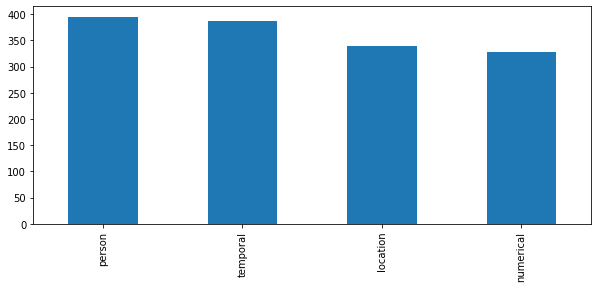

In [ ]:
#coarse type filtering
df=df[df['CoarseType'].isin(['location','temporal','numerical','person'])]
coarse_type=df['CoarseType'].unique()
print(coarse_type)
plt.figure(figsize=(10,4))
df.CoarseType.value_counts().plot(kind='bar');


In [ ]:
def print_plot(index):
    example = df[df.index == index][['Questions', 'CoarseType']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Coarse Type:', example[1])

In [ ]:
print_plot(10)

प्रथम आर्थिक गणनाको नतिजा कहिले सार्वजनिक गरियो ?
Coarse Type: temporal


**Text Preprocessig**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# print(stopwords.words('nepali'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#removing text inside brackets and quotes
import re
def removeTextInsideQuotesAndBrackets(text):
  text=re.sub("[\(\[].*?[\)\]]", "", text)
  text=re.sub("\'.*?\'","",text)
  text=re.sub('\".*?\"',"",text)
  return text

df['Questions'] = df['Questions'].apply(removeTextInsideQuotesAndBrackets)

In [ ]:
#Tokenization
df['Questions'] = df['Questions'].apply(lambda x: tokenize(x,'ne'))
#removing duplicates
df['Questions'] = df['Questions'].apply(lambda x: list(dict.fromkeys(x)))
df.head()



,Questions,CoarseType,FineType,WhWord,Domain
0,"[▁नेपाली, ▁क्रिकेट, ▁टिम, ▁क्याप्टेन, मा, ▁ज्ञ...",temporal,date,कहिले,Sports
2,"[▁विश्व, ▁शान्ति, ▁सू, चा, ंक, ▁, २०१९, ▁अनुसा...",numerical,rank,कति,Miscellaneous
3,"[▁एक, ▁फलफूल, को, ▁बोट, ▁रु, ▁दश, ▁नोट, "", ▁का...",location,city,कुन,Politics
4,"[▁माथिल्लो, ▁त्रिशुली, ▁थ्री, ▁जल, विध, ुत, ▁आ...",temporal,date,कहिले,Miscellaneous
5,"[▁अर्थमन्त्री, ▁युवराज, ▁खतिवडा, ले, ▁वि, ., स...",numerical,money,कति,Economics


In [ ]:
df['Questions'] = df['Questions'].apply(lambda x: ' '.join(x).replace('▁','').split())

#removing numbers
df['Questions'] = df['Questions'].apply(lambda x: ' '.join(x))
df['Questions'] = df['Questions'].apply(lambda x: ''.join(c for c in x if not c.isdigit()))

# from string import punctuation
punctuation=['!','"','#','$','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[',"]",'^','_','`','{','|','}','~']
df['Questions'] = df['Questions'].apply(lambda x: ''.join(c for c in x if c not in punctuation))

df.head()

,Questions,CoarseType,FineType,WhWord,Domain
0,नेपाली क्रिकेट टिम क्याप्टेन मा ज्ञानेन्द्र मल...,temporal,date,कहिले,Sports
2,विश्व शान्ति सू चा ंक अनुसार नेपाल कति औ स्था...,numerical,rank,कति,Miscellaneous
3,एक फलफूल को बोट रु दश नोट कार्यक्रमको सुरुवात...,location,city,कुन,Politics
4,माथिल्लो त्रिशुली थ्री जल विध ुत आयोजना को विध...,temporal,date,कहिले,Miscellaneous
5,अर्थमन्त्री युवराज खतिवडा ले वि स जेठ मा सं...,numerical,money,कति,Economics


In [ ]:
#stemmig
# nepstem = NepStemmer()
# df['Questions'] = df['Questions'].apply(nepstem.stem)
# df.head(10)

In [ ]:
WHWORDS = ['कुन','कहिले','के','कति','को','कसले','कहाँ','कसलाई','कसको','कस्तो','कति','कसरी','किन','कता']
STOPWORDS = stopwords.words('nepali')
# print(STOPWORDS)
print(len(STOPWORDS))

# Removig WH words from STOPWORDS
for word in WHWORDS:
  if word in STOPWORDS: STOPWORDS.remove(word)

print(len(STOPWORDS))
STOPWORDS=set(STOPWORDS)
def clean_text(text):
    text=' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    return text
df['Questions'] = df['Questions'].apply(clean_text)
print_plot(20)


['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [ ]:
print(df['Questions'].apply(lambda x: len(x.split(' '))).sum())
df.head()


12121


,Questions,CoarseType,FineType,WhWord,Domain
0,नेपाली क्रिकेट टिम क्याप्टेन ज्ञानेन्द्र मल्ल ...,temporal,date,कहिले,Sports
2,विश्व शान्ति सू चा ंक नेपाल कति औ स्थानमा,numerical,rank,कति,Miscellaneous
3,फलफूल को बोट रु दश नोट कार्यक्रमको सुरुवात कुन...,location,city,कुन,Politics
4,माथिल्लो त्रिशुली थ्री जल विध ुत आयोजना को विध...,temporal,date,कहिले,Miscellaneous
5,अर्थमन्त्री युवराज खतिवडा वि स जेठ संघ िय संसद...,numerical,money,कति,Economics


**Decleration**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier;
from sklearn.linear_model import LogisticRegression
TEST_SIZE=0.40


In [ ]:
def coarseModel(algorithm):
  X = df.Questions
  y = df.CoarseType
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state = 42) 

  if(algorithm=='nb'):
    model = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ]) 
  elif(algorithm=='sgd'):
    model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None, shuffle=True)), #Equivalent to linear svm
               ])
  elif(algorithm=="svm"):
    model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(SVC(C=1, kernel='sigmoid'))),    #Non linear svm
               ])
    # model = Pipeline([('vect', CountVectorizer()),
    #           ('tfidf', TfidfTransformer()),
    #           ('clf', LinearSVC(loss='hinge', penalty='l2', random_state=None, max_iter=5,tol=0.0001)), #Linear  svm
    #           ])
  else:
    model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
  

  model.fit(X_train, y_train)
  # %time

  y_pred = model.predict(X_test)

  model_accuracy = accuracy_score(y_pred, y_test)
  print('Accuracy : %s' % model_accuracy)
  print(classification_report(y_test, y_pred,target_names=coarse_type))
  return model




In [ ]:
nb_model=coarseModel('nb');

Accuracy : 0.7689655172413793
              precision    recall  f1-score   support

    temporal       0.83      0.59      0.69       144
   numerical       0.85      0.86      0.86       136
    location       0.82      0.73      0.77       157
      person       0.65      0.90      0.75       143

    accuracy                           0.77       580
   macro avg       0.79      0.77      0.77       580
weighted avg       0.79      0.77      0.77       580



In [ ]:
sgd_model=coarseModel('sgd')

Accuracy : 0.85
              precision    recall  f1-score   support

    temporal       0.81      0.63      0.71       144
   numerical       0.95      0.95      0.95       136
    location       0.82      0.88      0.85       157
      person       0.83      0.94      0.88       143

    accuracy                           0.85       580
   macro avg       0.85      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580



In [ ]:
svm_model=coarseModel('svm')

Accuracy : 0.8517241379310345
              precision    recall  f1-score   support

    temporal       0.82      0.63      0.71       144
   numerical       0.96      0.95      0.96       136
    location       0.81      0.89      0.85       157
      person       0.82      0.94      0.88       143

    accuracy                           0.85       580
   macro avg       0.85      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580



In [ ]:
# logreg_model=coarseModel('logreg')

**Predictions**

In [ ]:
validation_questions=[["सन् २०२० मार्चमा प्रदान गरिएको इन्टरनेसनल कम्युनिकेसन अवार्ड बाट सम्मानित व्यत्तित्व को हनुहुन्छ ? "],["नेपाल न्यून आय भएका मुलुकबाट न्यून मध्यम आय भएका मुलुकको सूचीमा कहिले स्तरोन्नति भएको हो ? "],
                      ["वि.सं. २०७७ असार २३ सरकारले नेपाल प्रहरी महानिरीक्षक (आईजीपी) मा कसलाई नियुक्त गर्यो ?"],["हाल रेडियो नेपालबाट कति भाषामा समाचार प्रसारण हुने गर्छ ?"],
                      ["समाजसेवी तथा शिक्षाविद् अङ्गुरबाबा जोशीको निधन कहिले भएको हो ?"],["सन् २०२० जुनमा सुरक्षा परिषदको अस्थायी सदस्यमा निर्वाचित हुन सफल राष्ट्र कुन कुन हुन ?"],
                      ["'एक वडा एक व्यायामशाला' निमाणको योजना अघि बढाउने स्थानीय तह कुन हो ?"],["बालबालिकाको क्षेत्रमा काम गर्ने अन्तर्राष्ट्रिय संस्था किवानिज इन्टरनेसनलको एसिया प्यासिफिक सम्मेलन हालै कहाँ सम्पन्न भयो ?"],
                      ["लोकसेवा आयोग विधेयक प्रतिनिधिसभाबाट कहिले पारित भएको हो ?"],["नेपालमा कृषक परिचयपत्र वितरण गर्ने कार्य कुन जिल्लाबाट सुरु गरिएको हो ?"],
                      ["विश्व बैंकद्वारा विसं २०७६ कात्तिक ७ मा सार्वजनिक डुइङ बिजनेस प्रतिवेदन २०२० अनुसार नेपाल कतिऔं स्थानमा रहेको छ ?"],['नेपाली पोर्टको शुभारम्भ कहिले भएको हो ?'],
                      ["सन्  २०१९/२० को विस्डन क्रिकेटर अफ द इयरको उपाधि जित्ने क्रिकेटर को हुन ?"],['सबै जिल्लामा स्वास्थ्य विमा सेवा लागु गर्ने पहिलो प्रदेश कुन हो ?']]
# print("Naive Bayes Classifier \n")
# for question in validation_questions:
#   test_pred= nb_model.predict(question)
#   print(question[0] +' : ' + test_pred[0])
# print('\n')

print("SGDC Classifier \n")
for question in validation_questions:
  test_pred= sgd_model.predict(question)
  print(question[0] +' : ' + test_pred[0])
print('\n')

print("Support Vector Machine \n")
for question in validation_questions:
  test_pred= svm_model.predict(question)
  print(question[0] +' : ' + test_pred[0])
print('\n')

# print("Logistic Regression \n")
# for question in validation_questions:
#   test_pred= logreg_model.predict(question)
#   print(question[0] +' : ' + test_pred[0])


SGDC Classifier 

सन् २०२० मार्चमा प्रदान गरिएको इन्टरनेसनल कम्युनिकेसन अवार्ड बाट सम्मानित व्यत्तित्व को हनुहुन्छ ?  : person
नेपाल न्यून आय भएका मुलुकबाट न्यून मध्यम आय भएका मुलुकको सूचीमा कहिले स्तरोन्नति भएको हो ?  : temporal
वि.सं. २०७७ असार २३ सरकारले नेपाल प्रहरी महानिरीक्षक (आईजीपी) मा कसलाई नियुक्त गर्यो ? : temporal
हाल रेडियो नेपालबाट कति भाषामा समाचार प्रसारण हुने गर्छ ? : numerical
समाजसेवी तथा शिक्षाविद् अङ्गुरबाबा जोशीको निधन कहिले भएको हो ? : temporal
सन् २०२० जुनमा सुरक्षा परिषदको अस्थायी सदस्यमा निर्वाचित हुन सफल राष्ट्र कुन कुन हुन ? : person
'एक वडा एक व्यायामशाला' निमाणको योजना अघि बढाउने स्थानीय तह कुन हो ? : numerical
बालबालिकाको क्षेत्रमा काम गर्ने अन्तर्राष्ट्रिय संस्था किवानिज इन्टरनेसनलको एसिया प्यासिफिक सम्मेलन हालै कहाँ सम्पन्न भयो ? : temporal
लोकसेवा आयोग विधेयक प्रतिनिधिसभाबाट कहिले पारित भएको हो ? : person
नेपालमा कृषक परिचयपत्र वितरण गर्ने कार्य कुन जिल्लाबाट सुरु गरिएको हो ? : temporal
विश्व बैंकद्वारा विसं २०७६ कात्तिक ७ मा सार्वजनिक डुइङ बिजनेस प्रत

**Fine Type Classification**

In [ ]:
#Model Function
def fineModel(type,algorithm):
  c_type=df[df['CoarseType']==type]
  f_type=c_type['FineType'].unique()
  # f_type=['individual','inventor','discoverer','appellation','group','position','other']
  print(f_type)
  #splittig
  X_fine = c_type.Questions
  Y_fine = c_type.FineType
  Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fine, Y_fine, test_size=TEST_SIZE, random_state = 42) 

  #Fine type model

  # model = Pipeline([('vect', CountVectorizer()),
  #                 ('tfidf', TfidfTransformer()),
  #                 ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
  #               ])
  model = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
              ('clf', OneVsRestClassifier(SVC(C=1, kernel='sigmoid'))),    #Non linear svm
              ])
  model.fit(Xf_train,yf_train )

  # %time

  yf_pred = model.predict(Xf_test)
  print(np.unique(yf_pred))

  fine_accuracy = accuracy_score(yf_pred, yf_test)
  print('Accuracy : %s' % fine_accuracy)
  # print(classification_report(yf_test, yf_pred,target_names=f_type))
  return model



In [ ]:
#person/Svm
person_model=fineModel('person','svm')

['individual' 'inventor' 'discoverer' 'appellation' 'group' 'other']
['individual' 'inventor']
Accuracy : 0.9243697478991597


In [ ]:
#organization/Svm
organization_model=fineModel('organization','svm')

In [ ]:
#location/Svm
location_model=fineModel('location','svm')

['city' 'district' 'state' 'country' 'address' 'other' 'river' 'mountain' 'continent' 'island' 'lake' 'region' 'desert']
['address' 'city' 'country' 'district' 'lake' 'other' 'region' 'river' 'state']
Accuracy : 0.6078431372549019


In [ ]:
#temporal/Svm
temporal_model=fineModel('temporal','svm')

['date' 'day' 'range' 'year' 'duration' 'time' 'other']
['date' 'year']
Accuracy : 0.8461538461538461


In [ ]:
#numerical/Svm
numerical_model=fineModel('numerical','svm')

['rank' 'money' 'percentage' 'count' 'length' 'age' 'area' 'speed' 'other' 'temperture' 'frequency' 'weight' 'range'
 'power']
['area' 'count' 'length' 'money' 'other' 'percentage' 'speed' 'temperture']
Accuracy : 0.6565656565656566


In [ ]:
#explanation/Svm
explanation_model=fineModel('explanation','svm')

In [ ]:
#miscelleneous/Svm
miscellaneous_model=fineModel('miscellaneous','svm')

**Overall Prediction**

In [ ]:
validation_questions=[["सन् २०२० मार्चमा प्रदान गरिएको इन्टरनेसनल कम्युनिकेसन अवार्ड बाट सम्मानित व्यत्तित्व को हनुहुन्छ ? "],["नेपाल न्यून आय भएका मुलुकबाट न्यून मध्यम आय भएका मुलुकको सूचीमा कहिले स्तरोन्नति भएको हो ? "],
                      ["वि.सं. २०७७ असार २३ सरकारले नेपाल प्रहरी महानिरीक्षक (आईजीपी) मा कसलाई नियुक्त गर्यो ?"],["हाल रेडियो नेपालबाट कति भाषामा समाचार प्रसारण हुने गर्छ ?"],
                      ["समाजसेवी तथा शिक्षाविद् अङ्गुरबाबा जोशीको निधन कहिले भएको हो ?"],["सन् २०२० जुनमा सुरक्षा परिषदको अस्थायी सदस्यमा निर्वाचित हुन सफल राष्ट्र कुन कुन हुन ?"],
                      ["'एक वडा एक व्यायामशाला' निमाणको योजना अघि बढाउने स्थानीय तह कुन हो ?"],["बालबालिकाको क्षेत्रमा काम गर्ने अन्तर्राष्ट्रिय संस्था किवानिज इन्टरनेसनलको एसिया प्यासिफिक सम्मेलन हालै कहाँ सम्पन्न भयो ?"],
                      ["लोकसेवा आयोग विधेयक प्रतिनिधिसभाबाट कहिले पारित भएको हो ?"],["नेपालमा कृषक परिचयपत्र वितरण गर्ने कार्य कुन जिल्लाबाट सुरु गरिएको हो ?"],
                      ["विश्व बैंकद्वारा विसं २०७६ कात्तिक ७ मा सार्वजनिक डुइङ बिजनेस प्रतिवेदन २०२० अनुसार नेपाल कतिऔं स्थानमा रहेको छ ?"],['नेपाली पोर्टको शुभारम्भ कहिले भएको हो ?'],
                      ["सन्  २०१९/२० को विस्डन क्रिकेटर अफ द इयरको उपाधि जित्ने क्रिकेटर को हुन ?"],['सबै जिल्लामा स्वास्थ्य विमा सेवा लागु गर्ने पहिलो प्रदेश कुन हो ?']]

print("SVM Model")
for question in validation_questions:
  test_pred= svm_model.predict(question)
  coarse_type=test_pred[0]
  if(coarse_type=='person'):
    fine_type=person_model.predict(question)
  elif(coarse_type=='organization'):
    fine_type=organization_model.predict(question)
  elif(coarse_type=='location'):
    fine_type=location_model.predict(question)
  elif(coarse_type=='temporal'):
    fine_type=temporal_model.predict(question)
  elif(coarse_type=='numerical'):
    fine_type=numerical_model.predict(question)
  elif(coarse_type=='explanation'):
    fine_type=explanation_model.predict(question)
  elif(coarse_type=='miscellaneous'):
    fine_type=miscellaneous_model.predict(question)
  else:
    print("Coarse type didn't match")

  print(question[0] +" "+ coarse_type+ " : " +fine_type[0])
print('\n')

SVM Model
सन् २०२० मार्चमा प्रदान गरिएको इन्टरनेसनल कम्युनिकेसन अवार्ड बाट सम्मानित व्यत्तित्व को हनुहुन्छ ?  temporal : date
नेपाल न्यून आय भएका मुलुकबाट न्यून मध्यम आय भएका मुलुकको सूचीमा कहिले स्तरोन्नति भएको हो ?  temporal : date
वि.सं. २०७७ असार २३ सरकारले नेपाल प्रहरी महानिरीक्षक (आईजीपी) मा कसलाई नियुक्त गर्यो ? person : individual
हाल रेडियो नेपालबाट कति भाषामा समाचार प्रसारण हुने गर्छ ? numerical : count
समाजसेवी तथा शिक्षाविद् अङ्गुरबाबा जोशीको निधन कहिले भएको हो ? temporal : date
सन् २०२० जुनमा सुरक्षा परिषदको अस्थायी सदस्यमा निर्वाचित हुन सफल राष्ट्र कुन कुन हुन ? person : individual
'एक वडा एक व्यायामशाला' निमाणको योजना अघि बढाउने स्थानीय तह कुन हो ? location : country
बालबालिकाको क्षेत्रमा काम गर्ने अन्तर्राष्ट्रिय संस्था किवानिज इन्टरनेसनलको एसिया प्यासिफिक सम्मेलन हालै कहाँ सम्पन्न भयो ? temporal : date
लोकसेवा आयोग विधेयक प्रतिनिधिसभाबाट कहिले पारित भएको हो ? temporal : date
नेपालमा कृषक परिचयपत्र वितरण गर्ने कार्य कुन जिल्लाबाट सुरु गरिएको हो ? temporal : date
विश्व ब